# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Scraping Dataset with Kaggle API

In [3]:
! pip install kaggle

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download tejashvi14/employee-future-prediction

employee-future-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! kaggle datasets download tejashvi14/employee-future-prediction -f employee.csv

Employee.csv: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
df = pd.read_excel('Employee.xlsx')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# Data Preprocessing

### Data Types

In [12]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [13]:
df['PaymentTier'] = df['PaymentTier'].astype('category')
df['Education'] = df['Education'].astype('category')
df['City'] = df['City'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['EverBenched'] = df['EverBenched'].astype('category')
df['LeaveOrNot'] = df['LeaveOrNot'].astype('category')

In [14]:
df['Education'].value_counts()
df['City'].value_counts()

Bangalore    2410
Pune         1342
New Delhi    1248
Name: City, dtype: int64

In [15]:
df.dtypes

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                  category
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                   category
dtype: object

### Missing Value

In [16]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [17]:
df['Education'].unique()

['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']

### Duplicate Value

In [18]:
colnames = df.columns
dupl = df.duplicated(subset = ['Education', 'JoiningYear', 'City', 'Age', 'Gender'], keep = False)
df[dupl].sort_values(by='Age')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4070,Bachelors,2015,Pune,1,22,Female,No,0,1
4119,Bachelors,2015,New Delhi,3,22,Male,No,0,0
4098,Bachelors,2014,Bangalore,3,22,Male,No,0,0
4852,Bachelors,2016,Bangalore,1,22,Male,Yes,6,1
91,Bachelors,2015,New Delhi,3,22,Male,No,0,0
...,...,...,...,...,...,...,...,...,...
3114,Bachelors,2016,Bangalore,3,41,Male,No,1,0
3602,Masters,2017,New Delhi,2,41,Male,No,3,1
3583,Bachelors,2017,Pune,3,41,Male,No,2,0
3321,Bachelors,2014,Bangalore,3,41,Male,No,4,0


### Label Encoding

In [19]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Education']= le.fit_transform(df['Education'])
df['City']= le.fit_transform(df['City'])
df['PaymentTier']= le.fit_transform(df['PaymentTier'])
df['Gender']= le.fit_transform(df['Gender'])
df['EverBenched']= le.fit_transform(df['EverBenched'])
df['LeaveOrNot']= le.fit_transform(df['LeaveOrNot'])

In [20]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,2,34,1,0,0,0
1,0,2013,2,0,28,0,0,3,1
2,0,2014,1,2,38,0,0,2,0
3,1,2016,0,2,27,1,0,5,1
4,1,2017,2,2,24,1,1,2,1


# Exploratory Data Analysis

### Outlier Detection

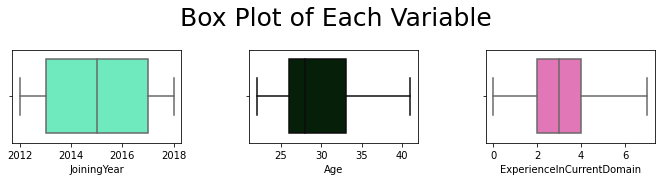

In [21]:
#Create box plot each columns in data test
import random
plt.figure(figsize=(20,12))
plt.suptitle('Box Plot of Each Variable',y=(0.93),x=(0.35), fontsize=25)


number_of_colors = len(df.columns)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
step = 0
for i in ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']:
  plt.subplot(5,5,step+1)
  sns.boxplot(x=df[i], color=color[step])
  step = step +1

plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

### Distribution

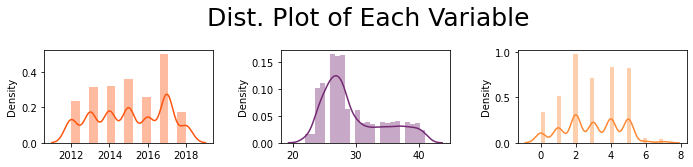

In [22]:
#Create box plot each columns in data test
import random
plt.figure(figsize=(20,12))
plt.suptitle('Dist. Plot of Each Variable',y=(0.93),x=(0.35), fontsize=25)


number_of_colors = len(df.columns)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
step = 0
for i in ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']:
  plt.subplot(5,5,step+1)
  sns.distplot(x=df[i], color=color[step])
  step = step +1

plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

### Feature Importance

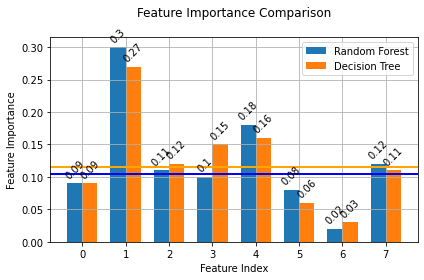

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns = 'LeaveOrNot')
y = df['LeaveOrNot']

# define the model
model_rf = RandomForestClassifier()
model_dt = DecisionTreeClassifier()

# fit the model
model_rf.fit(X, y)
model_dt.fit(X, y)

# get importance
importance_rf = np.round(model_rf.feature_importances_,2)
importance_dt = np.round(model_dt.feature_importances_,2)

# create label for x acis
labels = ['0', '1', '2', '3',
           '4', '5', '6', '7']

# label location
x = np.arange(len(labels))

# set width of bars
width = 0.35 

# create bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, importance_rf, width, label='Random Forest')
rects2 = ax.bar(x + width/2, importance_dt, width, label='Decision Tree')

# add a horizontal line
ax.axhline(np.median(importance_rf), color='blue', linewidth=2)
ax.axhline(np.median(importance_dt), color='orange', linewidth=2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Index')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance Comparison\n')
ax.legend()

# add a bar label
ax.bar_label(rects1, padding=3, rotation = 45)
ax.bar_label(rects2, padding=3, rotation = 45)

fig.tight_layout()

plt.grid()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e73b0e71-d542-44f1-99fa-91c86221896d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>